# Day 1

In [1]:
## Install Pandas Data Reader
#!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
df_tesla = pdr.get_data_yahoo('TSLA') # gets data of past 5 years of a stock eg. TESLA coded as 'TSLA' source Yahoo

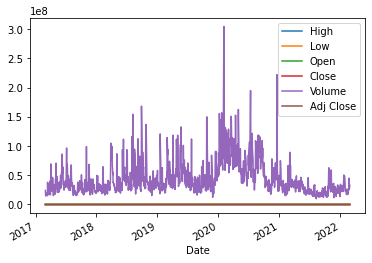

In [4]:
df_tesla.plot() #Volumne is huge hence only purple lines

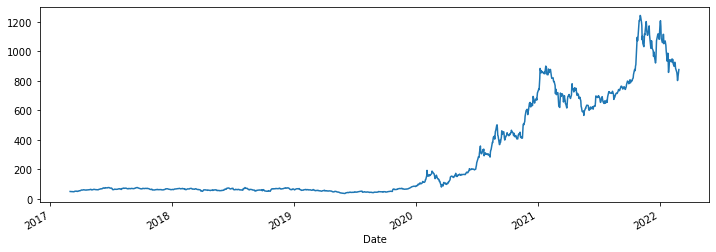

In [5]:
df_tesla['High'].plot(figsize = (12,4))

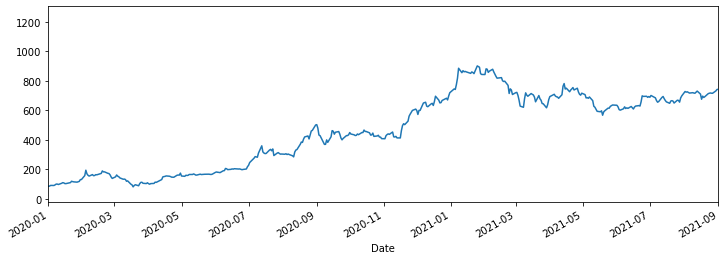

In [6]:
# Limiting x - to see the graph more closely
df_tesla['High'].plot(xlim = ['2020-01-01', '2021-09-01'], figsize = (12,4))

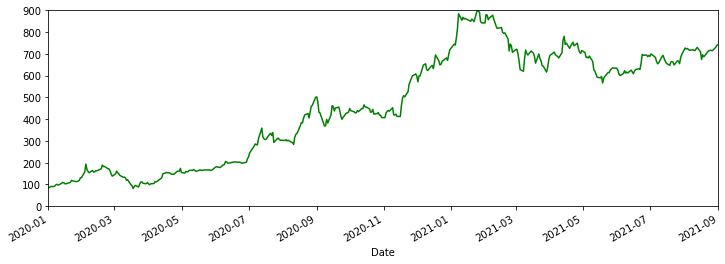

In [7]:
# Limiting x and y -- to see the graph more closely
df_tesla['High'].plot(xlim = ['2020-01-01', '2021-09-01'], ylim = [0,900], figsize = (12,4), c='green')

In [8]:
index = df_tesla.loc['2020-01-01': '2021-09-01'].index
share_open = df_tesla.loc['2020-01-01': '2021-09-01']['Open']

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

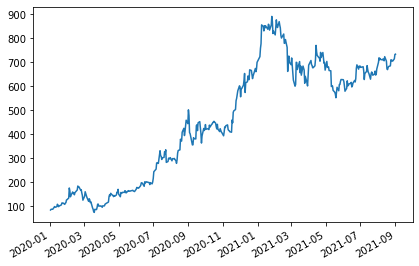

In [10]:
fig,ax = plt.subplots()
plt.tight_layout()
fig.autofmt_xdate() ## Prevents overlapping of the dates
ax.plot(index, share_open)

In [11]:
## Datetime index
df_tesla = df_tesla.reset_index()
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [12]:
df_tesla = df_tesla.set_index('Date', drop=True) # To set the indexes again

In [13]:
date = datetime(2021,11,21)

date.date()

datetime.date(2021, 11, 21)

In [14]:
date.day, date.weekday(), date.year


(21, 6, 2021)

### Time Resampling 

https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [15]:
df_tesla.resample(rule = 'A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.556000,48.964001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


In [16]:
df_tesla.resample(rule = 'A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


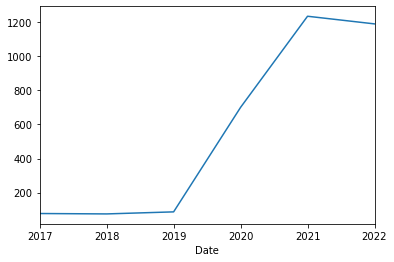

In [17]:
# Year end frequency
df_tesla.resample(rule = 'A').max()['Open'].plot()

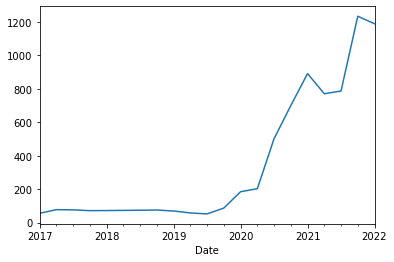

In [18]:
# Quarter start frequency
df_tesla.resample(rule = 'Q').max()['Open'].plot()

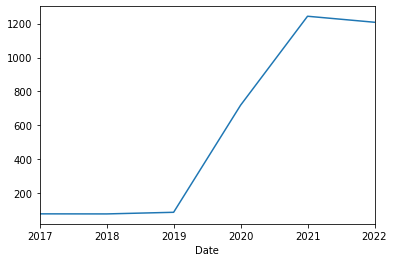

In [19]:
#Business End Frequency
df_tesla.resample(rule = 'BA').max()['High'].plot()


In [20]:
df_tesla.resample(rule = 'BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,56.400002,55.442001,55.745998,55.660000,39938000.0,55.660000
2017-04-03,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-03,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


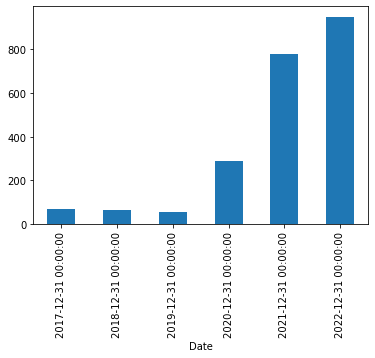

In [21]:
df_tesla.resample(rule = 'A').mean()['Open'].plot(kind='bar')

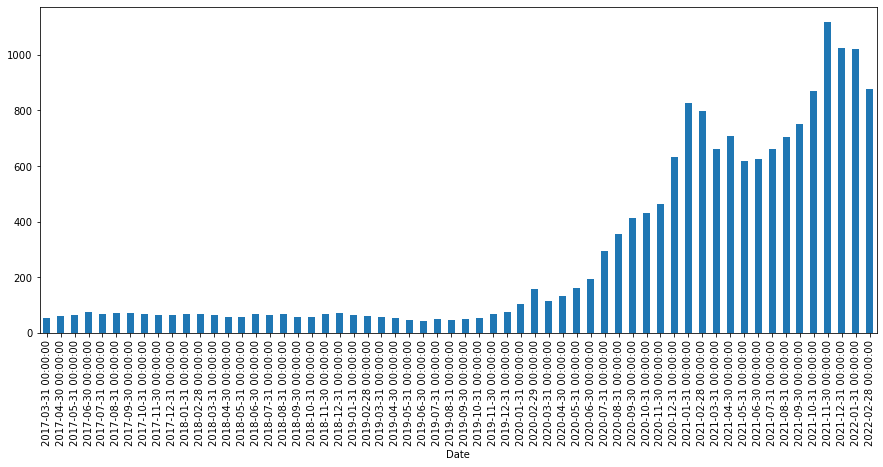

In [22]:
df_tesla.resample(rule = 'M').mean()['Open'].plot(kind='bar', figsize = (15,6))

In [23]:
df_tesla['High'].rolling(10).mean().head(20)

Date
2017-03-01        NaN
2017-03-02        NaN
2017-03-03        NaN
2017-03-06        NaN
2017-03-07        NaN
2017-03-08        NaN
2017-03-09        NaN
2017-03-10        NaN
2017-03-13        NaN
2017-03-14    50.3164
2017-03-15    50.4394
2017-03-16    50.6888
2017-03-17    50.9574
2017-03-20    51.2144
2017-03-21    51.4326
2017-03-22    51.5326
2017-03-23    51.7128
2017-03-24    52.0606
2017-03-27    52.5350
2017-03-28    52.9862
Name: High, dtype: float64

In [24]:
df_tesla['Open: 30 days Rolling'] = df_tesla['Open'].rolling(30).mean()

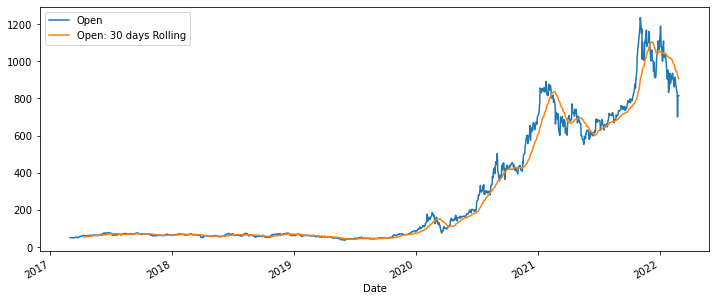

In [25]:
df_tesla[['Open', 'Open: 30 days Rolling']].plot(figsize = (12,5))

##### Assignment
1. Read the Microsoft data
2. Get the maximum price of the share from 2017 to 2022
3. Which is the day for the highest & lowest price of the stock(5 years)? Also read news for that day


# DAY 2


In [26]:
df_tesla = pdr.get_data_yahoo('TSLA') 

### Simple moving average

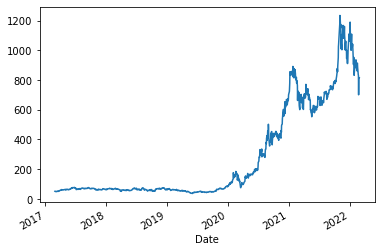

In [27]:
df_tesla['Open'].plot()

In [28]:
df_tesla['Open: 10 day Rolling'] = df_tesla['Open'].rolling(window = 10, min_periods = 1).mean()

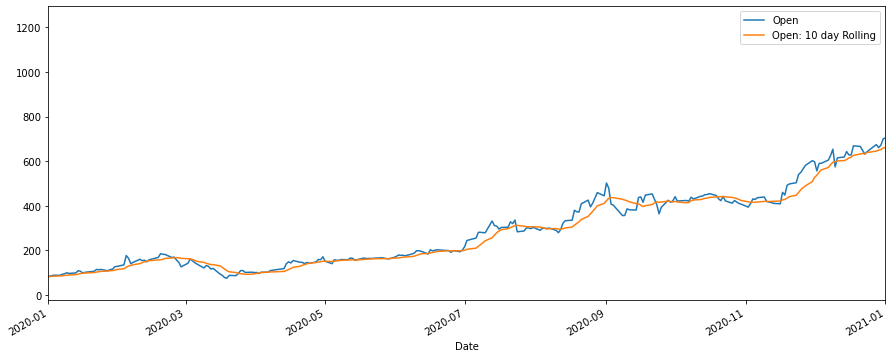

In [29]:
df_tesla[['Open','Open: 10 day Rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

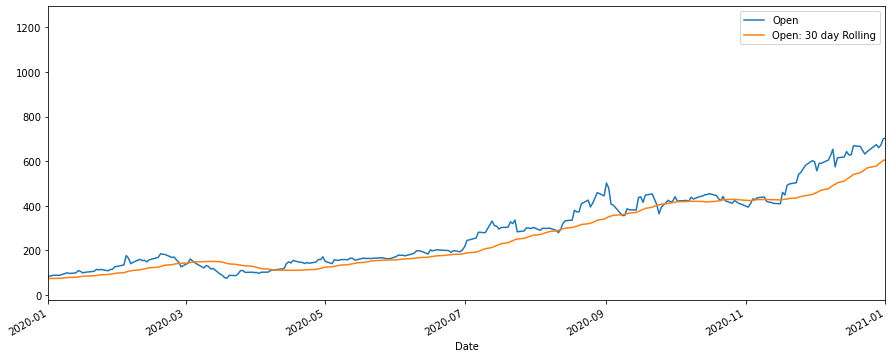

In [30]:
df_tesla['Open: 30 day Rolling'] = df_tesla['Open'].rolling(window = 30, min_periods = 1).mean()
df_tesla[['Open','Open: 30 day Rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

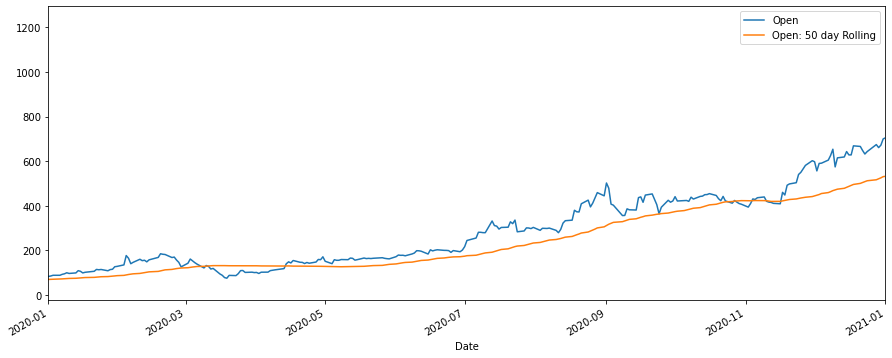

In [31]:
df_tesla['Open: 50 day Rolling'] = df_tesla['Open'].rolling(window = 50, min_periods = 1).mean()
df_tesla[['Open','Open: 50 day Rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

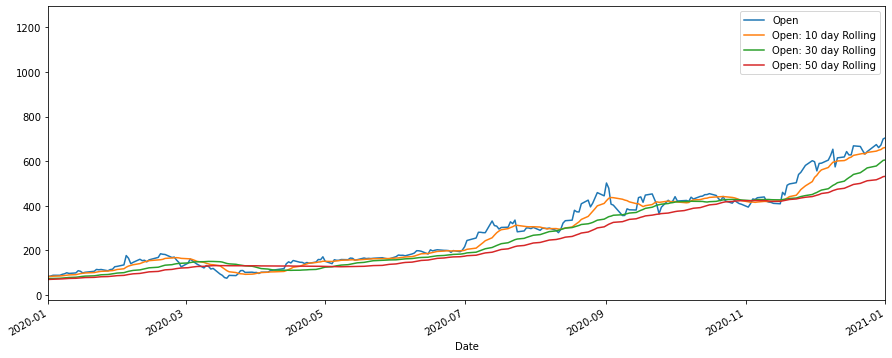

In [32]:
cols = ['Open','Open: 10 day Rolling','Open: 30 day Rolling','Open: 50 day Rolling' ]
df_tesla[cols].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

###  Cumulative Moving Average

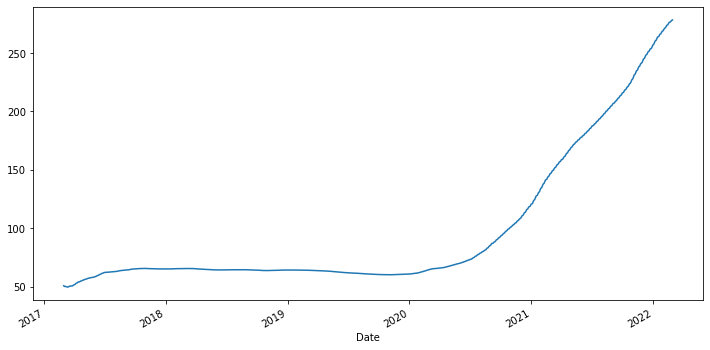

In [33]:
#Expansion

df_tesla['Open'].expanding().mean().plot(figsize = (12,6) )

### Exponential Weighted Moving Average

Formula: (close - previous EMA*multiplier) + prev EMA

multiplier = 2/(rollingwindowsize+1)

mul_10 = 2/11 = 0.181818

In [34]:
2/11

0.18181818181818182

For eg. for rolling window 10, for 1st 10 values EMA is 0. so starting from 11th entry --  11th entry is SMA. 

In [35]:
df_tesla.head(20)

,High,Low,Open,Close,Volume,Adj Close,Open: 10 day Rolling,Open: 30 day Rolling,Open: 50 day Rolling
Date,,,,,,,,,
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002,50.835999,50.835999,50.835999
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001,50.389000,50.389000,50.389000
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999,50.308666,50.308666,50.308666
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,50.127000,50.127000,50.127000
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,50.178400,50.178400,50.178400
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,50.048667,50.048667,50.048667
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,49.974000,49.974000,49.974000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,49.882500,49.882500,49.882500
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001,49.780445,49.780445,49.780445


prev ema = Average(first 10 close values)

12th entry = (49.234001 - prev_ema)*0.18181 + prev_ema. Similarly for other values

In [36]:
df_tesla['EMA_0.10'] = df_tesla['Open'].ewm(span = 5, adjust = False).mean()

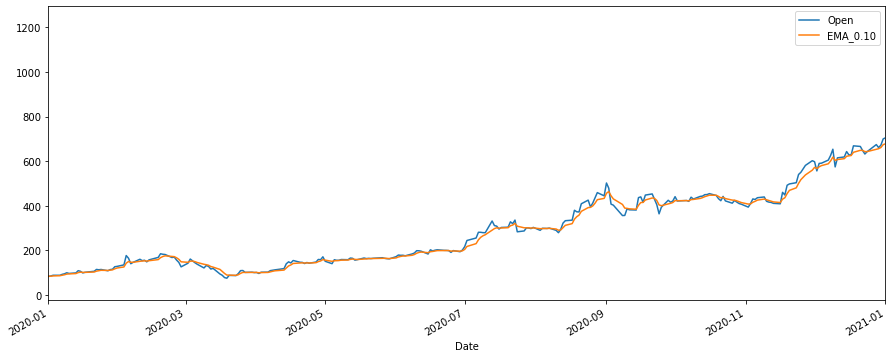

In [37]:
df_tesla[['Open', 'EMA_0.10']].plot(xlim = ['2020-01-01', '2021-01-01'], figsize = (15,6))

### ARIMA

In [38]:
df_airline = pd.read_csv("airline_passengers.csv")
df_airline.head(3)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0


In [39]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [40]:
df_airline.dropna(axis = 0, inplace=True)

In [41]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [42]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [43]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [44]:
df_airline.set_index('Month', inplace=True)

In [45]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [46]:
df_airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0
1960-11-01,390.0
1960-12-01,432.0


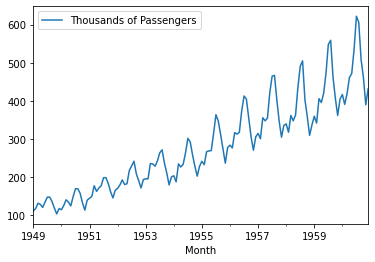

In [47]:
df_airline.plot() # seasonal data --  increasing trend

###  Dickey Fuller Test - Differencing

In [48]:
#!pip install statsmodels

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
def adfuller_test(series):
    
    result = adfuller(series)
    print("ADF Stats:", result[0])
    print("p-value:", result[1])   
    if(result[1] <= 0.05): #if result's p value is < 0.05 -- no unit root at stationary
        print("Reject")
    else:
        print("Accept")
        

In [51]:
adfuller_test(df_airline['Thousands of Passengers'])

ADF Stats: 0.8153688792060511
p-value: 0.991880243437641
Accept


In [52]:
# using differencing technique

df_airline['First_Diff'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)
df_airline.head()

,Thousands of Passengers,First_Diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [53]:
adfuller_test(df_airline['First_Diff'].dropna())

ADF Stats: -2.8292668241699883
p-value: 0.054213290283826945
Accept


In [54]:
df_airline['Second_Diff'] = df_airline['First_Diff'] - df_airline['First_Diff'].shift(1)
df_airline.head()

,Thousands of Passengers,First_Diff,Second_Diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [55]:
adfuller_test(df_airline['Second_Diff'].dropna())

ADF Stats: -16.384231542468527
p-value: 2.732891850014085e-29
Reject


Now the data has no unit root and is stationary.

In [56]:
# !2 months shift -- when data is seasonal use 12 months difference
df_airline['12_diff'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)
print(df_airline.head())
adfuller_test(df_airline['12_diff'].dropna())

            Thousands of Passengers  First_Diff  Second_Diff  12_diff
Month                                                                
1949-01-01                    112.0         NaN          NaN      NaN
1949-02-01                    118.0         6.0          NaN      NaN
1949-03-01                    132.0        14.0          8.0      NaN
1949-04-01                    129.0        -3.0        -17.0      NaN
1949-05-01                    121.0        -8.0         -5.0      NaN
ADF Stats: -3.3830207264924796
p-value: 0.011551493085515008
Reject


C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


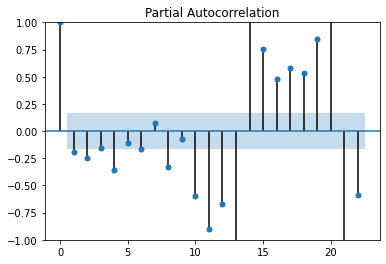

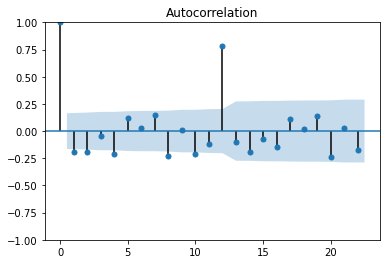

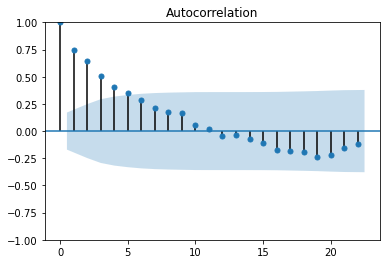

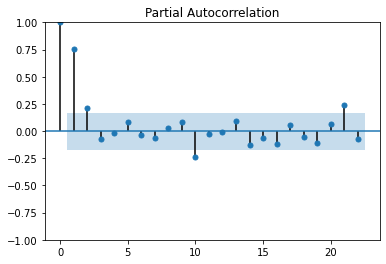

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(df_airline['Second_Diff'].dropna())
acf = plot_acf(df_airline['Second_Diff'].dropna())
acf_12 = plot_acf(df_airline['12_diff'].dropna())
pacf_12 = plot_pacf(df_airline['12_diff'].dropna())

Autocorrelation Second difference shows that after 12 instances there is a striking high correlation value, hence we can get information from the 12 difference plots.

From the autocorrelation plot of 12 difference we see that the p value comes out to be 5,
and from the partial autocorrelation plot of 12 diff we see that the q value comes out to be 2

### Training using ARIMA model

In [58]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1) #15 years train
test_dataset_end=datetime(1960,12,1) #5 years test

In [59]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [60]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [61]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [62]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,2))

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 2)   Log Likelihood                -325.184
Date:                     Tue, 01 Mar 2022   AIC                            676.368
Time:                             11:18:34   BIC                            707.655
Sample:                         01-01-1949   HQIC                           688.929
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0077      0.103      0.075      0.941      -0.193       0.209
ar.L2         -0.6389      0.098     -6.552      0.000      -0.830      -0.448
ar.L3         -0.2686      0.092     -2.910      0.004      -0.449      -0.088
ar.L4         -0.6036      0.078     -7.742      0.000      -0.756      -0.451
ar.L5         -0.2526      0.110     -2.294      0.022      -0.468      -0.037
ar.L6         -0.5219      0.096     -5.411      0.000      -0.711      -0.333
ar.L7         -0.2723      0.115     -2.366      0.018      -0.498      -0.047
ar.L8         -0.6729      0.099     -6.805      0.000      -0.867      -0.479
ar.L9         -0.1800      0.100     -1.808      0.071      -0.375       0.015
ar.L10        -0.6792      0.112     -6.075      0.000      -0.898      -0.460
ma.L1         -1.2855      0.137     -9.389      0.000      -1.554      -1.017
ma.L2          0.5530      0.133      4.150      0.000       0.292       0.814
sigma2       134.3889     27.967      4.805      0.000      79.574     189.204
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.26   Prob(JB):                         0.63
Heteroskedasticity (H):               2.63   Skew:                             0.22
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [66]:
pred = model_Arima_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = df_airline['Thousands of Passengers'] - pred

In [67]:
residuals.tail()

1960-08-01     44.356561
1960-09-01    -26.697858
1960-10-01    -43.774105
1960-11-01   -100.571650
1960-12-01    -62.467478
dtype: float64

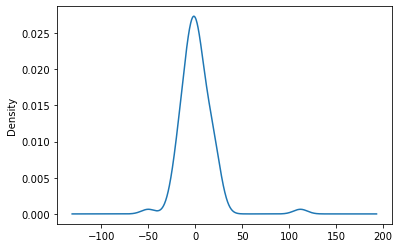

In [68]:
model_Arima_fit.resid.plot(kind='kde')

In [69]:
test_data['Predicted_ARIMA']=pred

C:\Users\verma\AppData\Local\Temp/ipykernel_19608/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


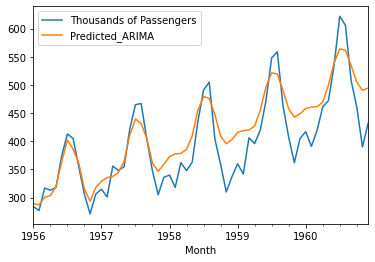

In [70]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

### Training using SARIMAX model

In [71]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12)) #p=3,q=5

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Tue, 01 Mar 2022   AIC                            548.481
Time:                                     11:18:35   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5995      0.939      0.638      0.523      -1.241       2.440
ar.L2          0.8314      0.232      3.577      0.000       0.376       1.287
ar.L3         -0.4539      0.896     -0.507      0.612      -2.209       1.301
ma.L1          0.1825      1.171      0.156      0.876      -2.112       2.477
ma.L2         -0.5355      1.269     -0.422      0.673      -3.023       1.952
ma.L3         -0.0986      0.386     -0.255      0.799      -0.856       0.659
ma.L4         -0.1270      0.340     -0.374      0.708      -0.793       0.539
ma.L5          0.2471      0.358      0.690      0.490      -0.455       0.949
sigma2        87.7135     81.766      1.073      0.283     -72.545     247.972
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

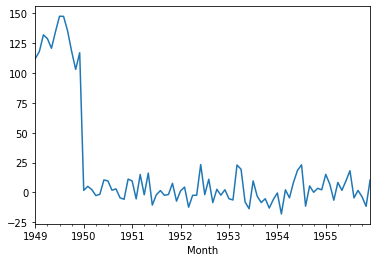

In [76]:
model_SARIMA_fit.resid.plot()

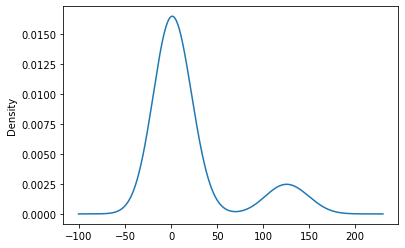

In [77]:
model_SARIMA_fit.resid.plot(kind='kde')

In [78]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\verma\AppData\Local\Temp/ipykernel_19608/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


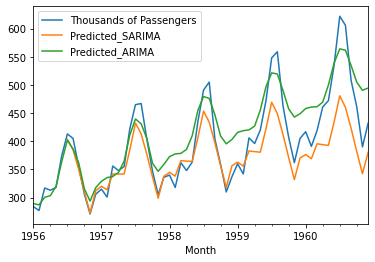

In [79]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

### FbProphet

In [84]:
import fbprophet

In [86]:
df_airline

,Thousands of Passengers,First_Diff,Second_Diff,12_diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [87]:
from fbprophet import Prophet

In [88]:
# initialize the model

model = Prophet()

In [89]:
train = df_airline['Thousands of Passengers']

In [91]:
df = df_airline.reset_index()

In [93]:
df = df[['Month', 'Thousands of Passengers']]

In [102]:
df.columns = ['ds', 'y']

In [104]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [106]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [108]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [107]:
# Create future dates of 365 days

future_dates = model.make_future_dataframe(periods = 365)

In [110]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [111]:
preds = model.predict(future_dates)

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [112]:
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,57.092480,112.988812,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,47.833934,105.047730,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,82.776611,138.884554,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,78.732704,135.283166,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,82.431447,138.817245,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1961-11-27,520.819339,470.189845,526.240741,520.346799,521.419515,-22.436946,-22.436946,-22.436946,-22.436946,-22.436946,-22.436946,0.0,0.0,0.0,498.382393
505,1961-11-28,520.919838,466.752056,524.608595,520.445163,521.522500,-24.063061,-24.063061,-24.063061,-24.063061,-24.063061,-24.063061,0.0,0.0,0.0,496.856777
506,1961-11-29,521.020338,467.758073,524.697439,520.543527,521.625151,-26.321914,-26.321914,-26.321914,-26.321914,-26.321914,-26.321914,0.0,0.0,0.0,494.698423
507,1961-11-30,521.120837,464.889573,520.428249,520.641891,521.727523,-29.169085,-29.169085,-29.169085,-29.169085,-29.169085,-29.169085,0.0,0.0,0.0,491.951751


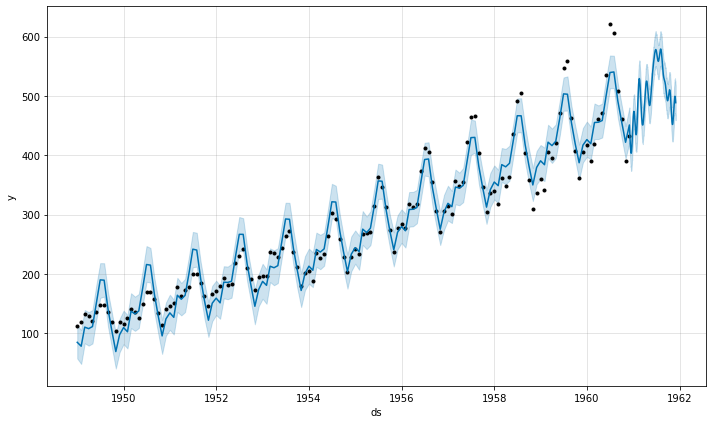

In [116]:
model.plot(preds);

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


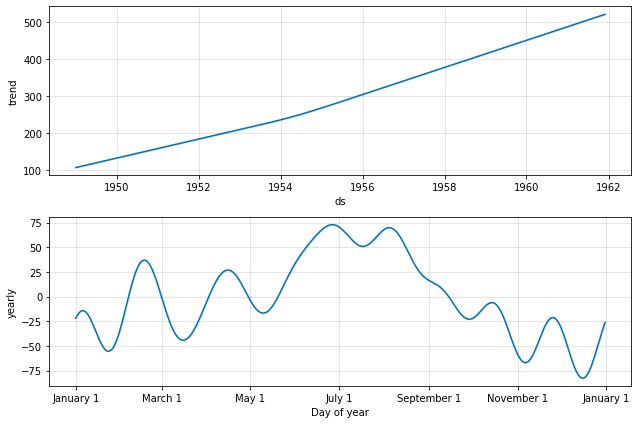

In [118]:
#Visualize components

model.plot_components(preds);

##### Cross-Validation in Time Series


Suppose timeframe is 1960 - 1962.
Cross validation will consider 1960-1961 as Train, 1961-62 as Test, and 1962-63(future) as validation.

In [119]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial = '730 days', period = '180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = 

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.819730,156.603935,157.050524,150.0,1951-01-18
1,1951-03-01,169.267028,168.524601,170.064364,178.0,1951-01-18
2,1951-04-01,156.601332,155.050146,158.284325,163.0,1951-01-18
3,1951-05-01,142.228261,139.811783,144.840884,172.0,1951-01-18
4,1951-06-01,177.404761,173.867778,181.165066,178.0,1951-01-18


In [120]:
from fbprophet.diagnostics import performance_metrics

df_perf = performance_metrics(df_cv)
df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1085.982413,32.954247,25.858707,0.078429,0.073811,0.227273
1,42 days,1013.087718,31.829039,25.298741,0.077251,0.073811,0.181818
2,46 days,910.373154,30.172391,24.801127,0.079580,0.084098,0.136364
3,47 days,1044.626120,32.320676,26.980818,0.082844,0.085696,0.136364
4,48 days,1033.404419,32.146608,26.391799,0.080742,0.085696,0.181818


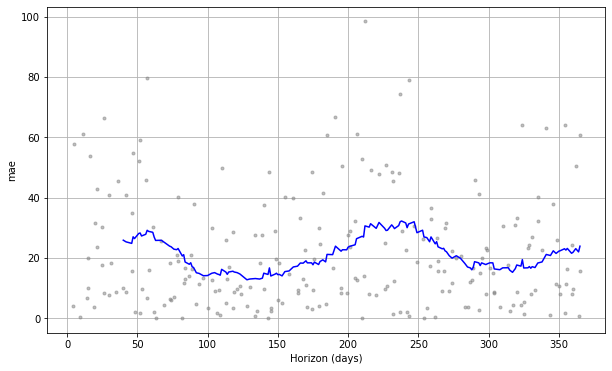

In [125]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric = 'mae')